<a href="https://colab.research.google.com/github/liliya2022/Python-Data-Analysis-Project/blob/main/Python_Data_Analysis_Project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project: Python Data Analysis Project 

By Liliya Lopez

Dataset: Uber and Lyft Dataset Boston, MA (Kaggle.com)

From 11-26-2018 to 12-18-2018


In [ ]:
# Libraries used: 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import datetime
import calendar


In [ ]:
from google.colab import drive

In [ ]:
#import os
#print(os.listdir('drive/MyDrive'))

In [ ]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Download the dataset:  

rideshare = pd.read_csv('drive/MyDrive/Colab Notebooks/rideshare_kaggle.csv')
pd.set_option('display.max_columns', 10)
rideshare.head()

,id,timestamp,hour,day,month,...,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,...,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,...,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,...,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,...,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,...,1543420800,29.11,1543392000,35.75,1543420800


In [ ]:
rideshare.iloc[:, [2, 3, 4, 5]].head(10)

,hour,day,month,datetime
0,9,16,12,2018-12-16 09:30:07
1,2,27,11,2018-11-27 02:00:23
2,1,28,11,2018-11-28 01:00:22
3,4,30,11,2018-11-30 04:53:02
4,3,29,11,2018-11-29 03:49:20
5,18,17,12,2018-12-17 18:25:12
6,5,26,11,2018-11-26 05:03:00
7,19,2,12,2018-12-02 19:53:04
8,6,3,12,2018-12-03 06:28:02
9,10,27,11,2018-11-27 10:45:22


In [ ]:
#Check the structure of the dataset: 

rideshare.info() # 693071 observations, # 57 columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [ ]:
# drop columns we won't use: 

dfrideshare=rideshare.drop(columns=['timestamp', 'timezone','apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 'apparentTemperatureMaxTime'])


dfrideshare.columns # 16 columns 


Index(['id', 'hour', 'day', 'month', 'datetime', 'source', 'destination',
       'cab_type', 'product_id', 'name', 'price', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'temperature'],
      dtype='object')

In [ ]:
dfrideshare['datetime'] = pd.to_datetime(dfrideshare['datetime'], format = '%Y/%m/%d %H:%M:%S')
dfrideshare.dtypes

id                          object
hour                         int64
day                          int64
month                        int64
datetime            datetime64[ns]
source                      object
destination                 object
cab_type                    object
product_id                  object
name                        object
price                      float64
distance                   float64
surge_multiplier           float64
latitude                   float64
longitude                  float64
temperature                float64
dtype: object

In [ ]:
# add 2 more columns: 
dayofweek=[]
weekday=[]
for x in dfrideshare['datetime']:
  dayofweek.append(x.dayofweek)
  weekday.append(calendar.day_name[dayofweek[-1]])
dfrideshare['day_of_week']=dayofweek
dfrideshare['weekday']=weekday

In [ ]:
dfrideshare.head()

,id,hour,day,month,datetime,...,latitude,longitude,temperature,day_of_week,weekday
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,9,16,12,2018-12-16 09:30:07,...,42.2148,-71.033,42.34,6,Sunday
1,4bd23055-6827-41c6-b23b-3c491f24e74d,2,27,11,2018-11-27 02:00:23,...,42.2148,-71.033,43.58,1,Tuesday
2,981a3613-77af-4620-a42a-0c0866077d1e,1,28,11,2018-11-28 01:00:22,...,42.2148,-71.033,38.33,2,Wednesday
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,4,30,11,2018-11-30 04:53:02,...,42.2148,-71.033,34.38,4,Friday
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,3,29,11,2018-11-29 03:49:20,...,42.2148,-71.033,37.44,3,Thursday


In [ ]:
# check for any missing data: 

np.sum(dfrideshare.isnull())

id                      0
hour                    0
day                     0
month                   0
datetime                0
source                  0
destination             0
cab_type                0
product_id              0
name                    0
price               55095
distance                0
surge_multiplier        0
latitude                0
longitude               0
temperature             0
day_of_week             0
weekday                 0
dtype: int64

In [ ]:
# clean the missing data: 

dfrideshare.dropna(axis = 0, inplace = True)
np.sum(dfrideshare.isnull()).sum()

0

In [ ]:
len(dfrideshare)

637976

In [ ]:
np.sum(dfrideshare.isnull())

id                  0
hour                0
day                 0
month               0
datetime            0
source              0
destination         0
cab_type            0
product_id          0
name                0
price               0
distance            0
surge_multiplier    0
latitude            0
longitude           0
temperature         0
day_of_week         0
weekday             0
dtype: int64

Uber versus Lyft comparasion

[Text(0.5, 1.0, 'Rides count per cab type')]

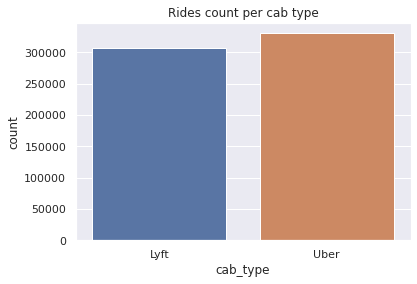

In [ ]:
# compare number of rides by cab type:

sns.set_theme(style="darkgrid")
sns.countplot(data = dfrideshare, x='cab_type').set(title = "Rides count per cab type")

[Text(0.5, 1.0, 'Rides count per cab name')]

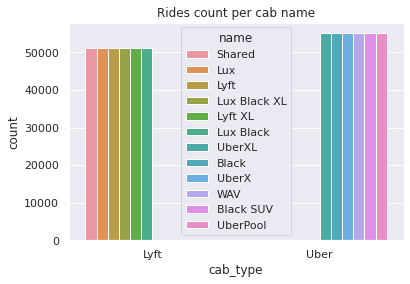

In [ ]:
# compare number of rides by names of cabs 

sns.countplot(x="cab_type", hue="name", data=dfrideshare).set(title = "Rides count per cab name") #uber cabs are used more often 

Text(0.5, 1.0, 'Histogram of price')

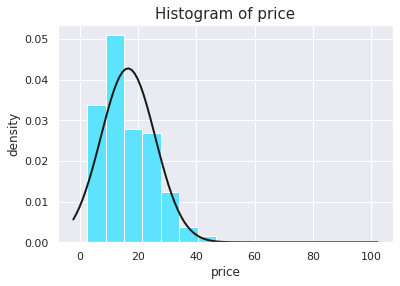

In [ ]:
#normal distribution graph for price(both cab types):

#mean and standard deviation: 
from scipy.stats import norm

mu, std = norm.fit(dfrideshare['price'])

#plot the histogram:

plt.hist(dfrideshare['price'], bins = 15, density=True, alpha=1, color = '#5ee3ff')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('price')
plt.ylabel('density')
plt.title('Histogram of price', fontsize = 15) 


**Compare pricing per cab type:**

Perform two sample t-test for Uber, Lyft price comparison:

Null Hypothesis (H0): Average prices for Uber rides = average prices for Lyft rides.

Alternative Hypothesis(HA): Average prices for Uber rides != average prices for Lyft rides.

In [ ]:
#create 2 separate dataframes for Uber and Lyft:

Uber_rides = dfrideshare[dfrideshare['cab_type'] == 'Uber'] # 330568 observations
Lyft_rides = dfrideshare[dfrideshare['cab_type'] == 'Lyft'] # 307408 observations

In [ ]:
#create Uber array: 

Uber_array = Uber_rides['price'].to_numpy()
Uber_array

array([12. , 16. ,  7.5, ...,  9.5, 27. , 10. ])

In [ ]:
len(Uber_array)

330568

In [ ]:
# create Lyft array: 

Lyft_array = Lyft_rides['price'].to_numpy()
Lyft_array

array([ 5. , 11. ,  7. , ...,  7. , 10.5, 32.5])

In [ ]:
len(Lyft_array)

307408

In [ ]:
# Mean of Uber price: 
print("Mean of prices for Uber rides:", Uber_array.mean().round())
# Mean of Lyft price: 
print("Mean of prices for Lyft rides:", Lyft_array.mean().round())

Mean of prices for Uber rides: 16.0
Mean of prices for Lyft rides: 17.0


In [ ]:
stats.ttest_ind(Uber_array, Lyft_array)

Ttest_indResult(statistic=-66.83531585586235, pvalue=0.0)

Conclusion: The p-value is equal to 0.0, less than the threshhold of P-value >0.05. As a result, we can reject null hypothesis and accept the alternative hypothesis. Conclusion: on average, rides prices for Lyft are higher than Uber.

Text(0.5, 1.0, 'Means of prices comparasion')

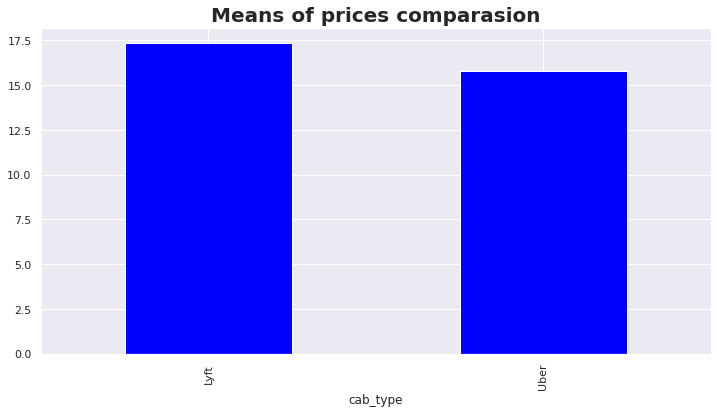

In [ ]:
#Graph representation of pricing: 

plt.figure(figsize = (12,6))
dfrideshare.groupby('cab_type')['price'].mean().sort_values(ascending=False).plot.bar(color = 'blue')
plt.title('Means of prices comparasion', fontweight="bold", size=20)

Text(0.5, 1.0, 'Median of prices comparasion')

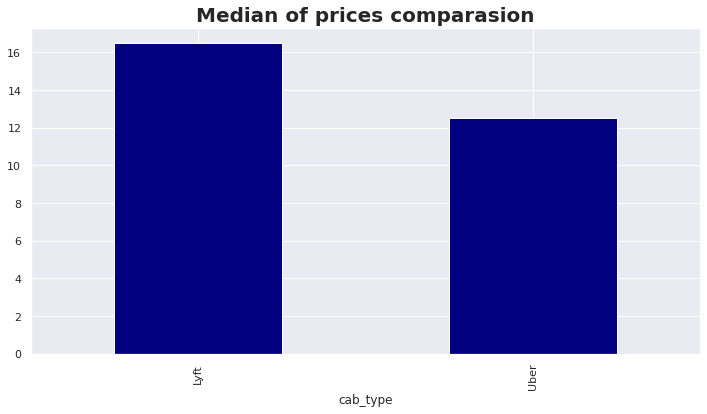

In [ ]:
plt.figure(figsize = (12,6))
dfrideshare.groupby('cab_type')['price'].median().sort_values(ascending=False).plot.bar(color = 'navy')
plt.title('Median of prices comparasion', fontweight="bold", size=20)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



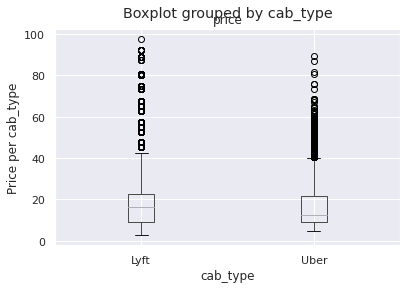

In [ ]:
#Boxplot of Uber and Lyft


dfrideshare[['cab_type', 'price']].boxplot(by = 'cab_type', column = 'price')
plt.ylabel('Price per cab_type')
plt.show()

[Text(0.5, 1.0, 'Box plot by cab_type')]

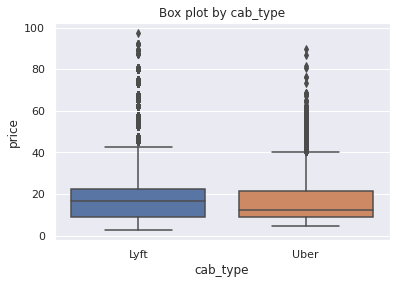

In [ ]:
df = dfrideshare[['cab_type', 'price']]
sns.boxplot(x='cab_type', y='price', data=df).set(title="Box plot by cab_type")


**Uber**




In [ ]:
Uber_rides.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330568 entries, 12 to 693070
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                330568 non-null  object        
 1   hour              330568 non-null  int64         
 2   day               330568 non-null  int64         
 3   month             330568 non-null  int64         
 4   datetime          330568 non-null  datetime64[ns]
 5   source            330568 non-null  object        
 6   destination       330568 non-null  object        
 7   cab_type          330568 non-null  object        
 8   product_id        330568 non-null  object        
 9   name              330568 non-null  object        
 10  price             330568 non-null  float64       
 11  distance          330568 non-null  float64       
 12  surge_multiplier  330568 non-null  float64       
 13  latitude          330568 non-null  float64       
 14  lon

In [ ]:
Uber_stats = Uber_rides.describe()
Uber_stats

,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,day_of_week
count,330568.000000,330568.000000,330568.000000,330568.000000,330568.000000,330568.0,330568.000000,330568.000000,330568.000000,330568.000000
mean,11.608864,17.820176,11.586028,15.795343,2.191386,1.0,42.337966,-71.066103,39.569407,2.779162
std,6.942370,9.973335,0.492544,8.560300,1.178973,0.0,0.048059,0.020325,6.720901,2.056707
min,0.000000,1.000000,11.000000,4.500000,0.020000,1.0,42.214800,-71.105400,18.910000,0.000000
25%,6.000000,13.000000,11.000000,9.000000,1.300000,1.0,42.350300,-71.081000,36.450000,1.000000
50%,12.000000,17.000000,12.000000,12.500000,2.170000,1.0,42.351900,-71.063100,40.490000,3.000000
75%,18.000000,28.000000,12.000000,21.500000,2.840000,1.0,42.364700,-71.054200,43.580000,5.000000
max,23.000000,30.000000,12.000000,89.500000,7.860000,1.0,42.366100,-71.033000,57.220000,6.000000


In [ ]:
Uber_stats.to_csv('uber_stats.csv', index=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



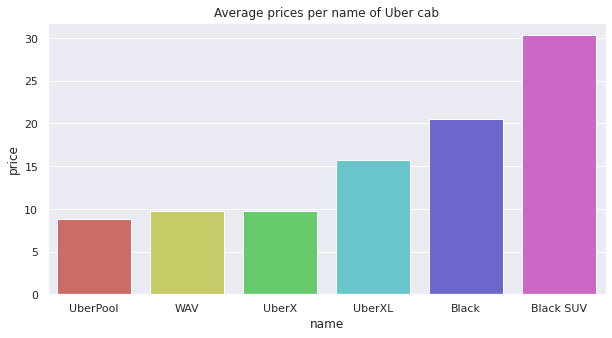

In [ ]:
#Prices per Uber's name: 
Price_Uber=Uber_rides.groupby(["name"])[["price"]].mean()
plt.figure(figsize = (10,5))
sns.barplot(Price_Uber.index, Price_Uber["price"], palette = "hls", order = Price_Uber["price"].sort_values().index).set(title = 'Average prices per name of Uber cab')
plt.show()

In [ ]:
Uber_rides['name'].unique()

array(['UberXL', 'Black', 'UberX', 'WAV', 'Black SUV', 'UberPool'],
      dtype=object)

In [ ]:
Uber_cor = Uber_rides.drop(['surge_multiplier'], axis =1).corr()
Uber_cor

,hour,day,month,price,distance,latitude,longitude,temperature,day_of_week
hour,1.000000,0.064251,-0.077185,0.000867,0.003180,0.018876,-0.009410,0.216520,-0.002339
day,0.064251,1.000000,-0.861319,0.001342,0.002760,0.006556,0.076758,-0.082067,-0.297897
month,-0.077185,-0.861319,1.000000,-0.001047,-0.000513,0.086899,-0.126384,-0.084017,0.301738
price,0.000867,0.001342,-0.001047,1.000000,0.336204,0.000979,-0.000574,0.001697,-0.001026
distance,0.003180,0.002760,-0.000513,0.336204,1.000000,0.002306,0.000706,-0.001377,0.001138
latitude,0.018876,0.006556,0.086899,0.000979,0.002306,1.000000,-0.534276,-0.097809,0.116043
longitude,-0.009410,0.076758,-0.126384,-0.000574,0.000706,-0.534276,1.000000,0.011575,-0.086459
temperature,0.216520,-0.082067,-0.084017,0.001697,-0.001377,-0.097809,0.011575,1.000000,-0.079239
day_of_week,-0.002339,-0.297897,0.301738,-0.001026,0.001138,0.116043,-0.086459,-0.079239,1.000000


In [ ]:
Uber_cor.to_csv('uber_cor.csv', index=True)

In [ ]:
# A correlation matrix for Uber dataset: 

Uber_cor.style.background_gradient()



,hour,day,month,price,distance,latitude,longitude,temperature,day_of_week
hour,1.000000,0.064251,-0.077185,0.000867,0.003180,0.018876,-0.009410,0.216520,-0.002339
day,0.064251,1.000000,-0.861319,0.001342,0.002760,0.006556,0.076758,-0.082067,-0.297897
month,-0.077185,-0.861319,1.000000,-0.001047,-0.000513,0.086899,-0.126384,-0.084017,0.301738
price,0.000867,0.001342,-0.001047,1.000000,0.336204,0.000979,-0.000574,0.001697,-0.001026
distance,0.003180,0.002760,-0.000513,0.336204,1.000000,0.002306,0.000706,-0.001377,0.001138
latitude,0.018876,0.006556,0.086899,0.000979,0.002306,1.000000,-0.534276,-0.097809,0.116043
longitude,-0.009410,0.076758,-0.126384,-0.000574,0.000706,-0.534276,1.000000,0.011575,-0.086459
temperature,0.216520,-0.082067,-0.084017,0.001697,-0.001377,-0.097809,0.011575,1.000000,-0.079239
day_of_week,-0.002339,-0.297897,0.301738,-0.001026,0.001138,0.116043,-0.086459,-0.079239,1.000000


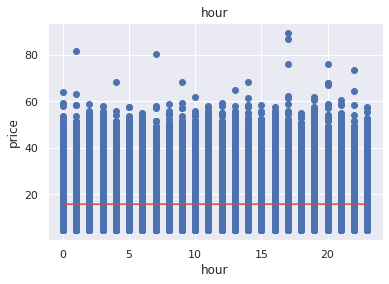

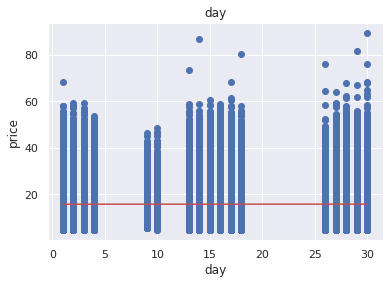

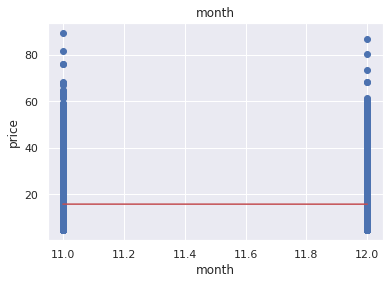

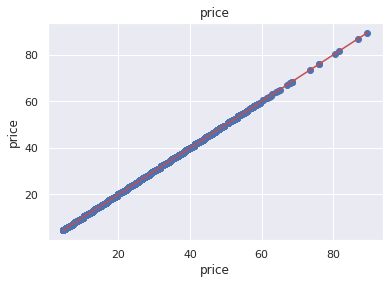

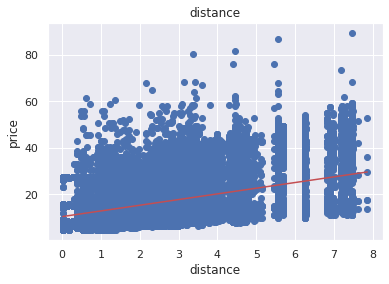

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning:

Polyfit may be poorly conditioned



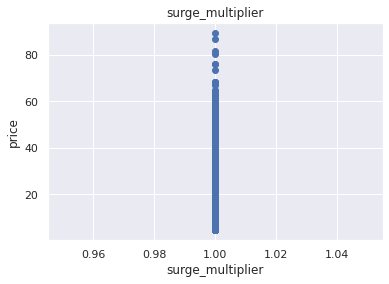

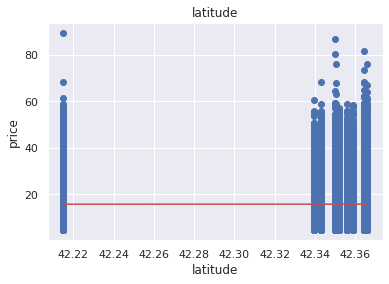

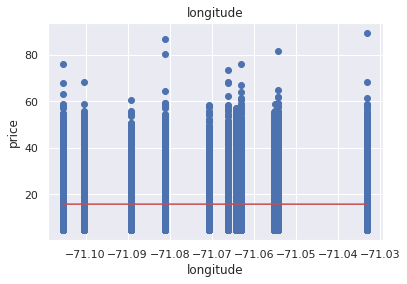

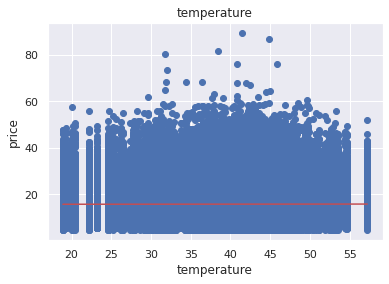

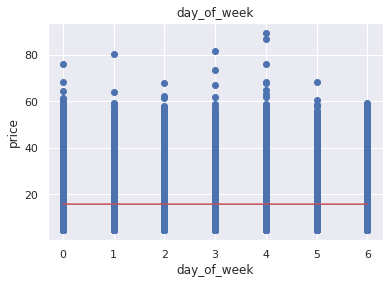

In [ ]:
#Graphs of correlation of price with other variables in Uber dataset:  

col_names_uber = Uber_rides.columns
for v in col_names_uber:
  if Uber_rides[v].dtypes in ("int64", "float64"):
    price = Uber_rides["price"]
    other = Uber_rides[v]
    plt.xlabel(v)
    plt.ylabel('price')
    plt.title(v)
    plt.scatter(other, price)
    try:
        plt.plot(np.unique(other), np.poly1d(np.polyfit(other, price, 1))(np.unique(other)), color="r")
    except:
      print(v)
    plt.show()

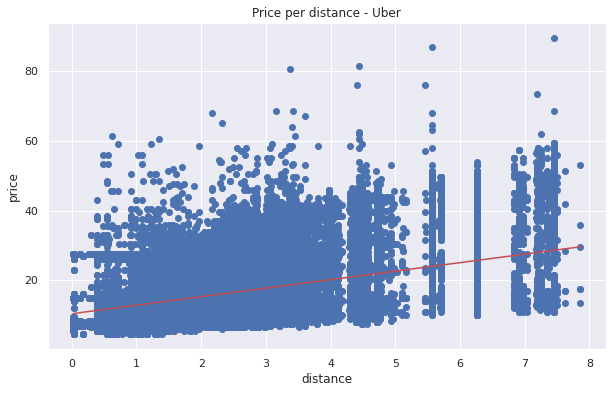

In [ ]:
#Price per distance analysis for Uber: 


distance = Uber_rides['distance']
price = Uber_rides['price']
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = distance, y = price)
plt.xlabel("distance")
plt.ylabel("price")
plt.title("Price per distance - Uber")
plt.plot(np.unique(distance), np.poly1d(np.polyfit(distance, price, 1))(np.unique(distance)), color="r")
plt.show()


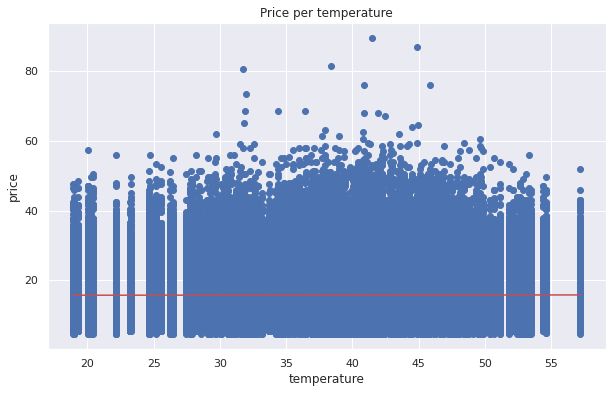

In [ ]:

distance = Uber_rides['temperature']
price = Uber_rides['price']
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = distance, y = price)
plt.xlabel("temperature")
plt.ylabel("price")
plt.title("Price per temperature")
plt.plot(np.unique(distance), np.poly1d(np.polyfit(distance, price, 1))(np.unique(distance)), color="r")
plt.show()

Text(0.5, 1.0, 'Frequency of distance for Uber rides')

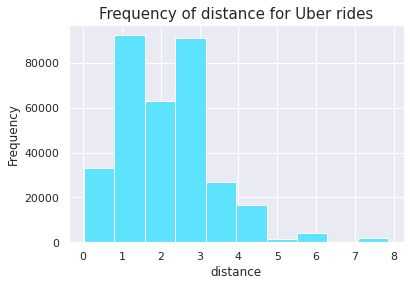

In [ ]:
# the distance people drive with Uber:

Uber_rides['distance'].plot.hist(bins = 10, alpha=1, color = "#5ee3ff")
plt.xlabel('distance')
plt.title('Frequency of distance for Uber rides', fontsize = 15) 

Text(0.5, 1.0, 'Number of trips per hours')

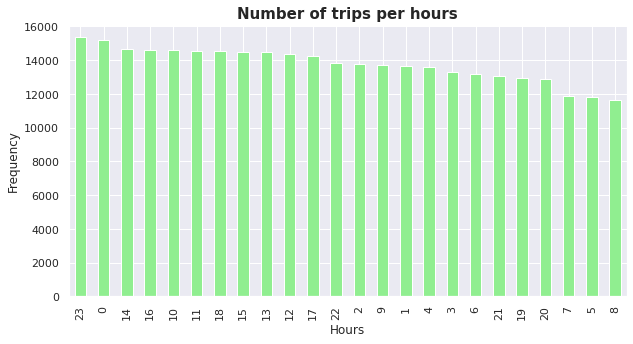

In [ ]:
# what hours people use the Uber: 

hours = Uber_rides['datetime'].dt.hour.value_counts()
hours.plot(kind='bar',color='lightgreen',figsize=(10,5))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of trips per hours', size = 15, fontweight="bold") # 11 pm

Text(0.5, 1.0, 'Number of trips per week day')

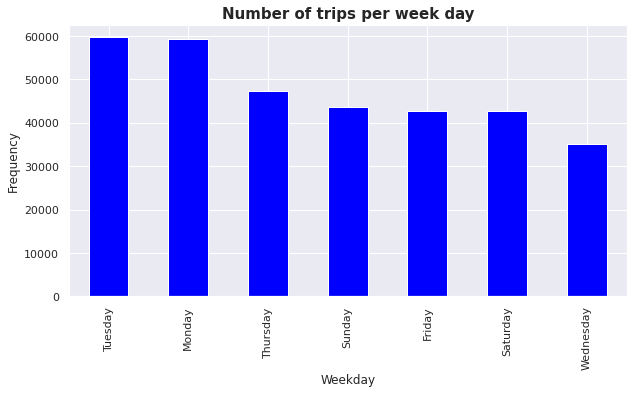

In [ ]:
# which weekday people use Uber the most:

Uber_rides['weekday'].value_counts().plot(kind='bar',figsize=(10,5),color='blue')
plt.xlabel('Weekday')
plt.ylabel('Frequency')
plt.title('Number of trips per week day', size = 15, fontweight="bold")


Text(0.5, 1.0, 'Number of trips per day, month')

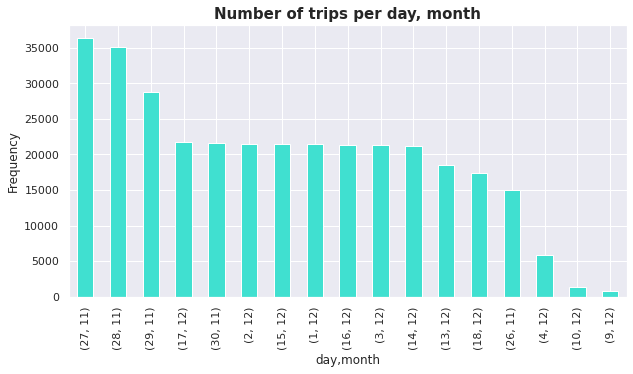

In [ ]:
#Which day has the highest count of with Uber: 

Uber_rides[['day', 'month']].value_counts().plot(kind='bar',figsize=(10,5),color='turquoise')
plt.ylabel('Frequency')
plt.title('Number of trips per day, month', size = 15, fontweight="bold")


 #Thansgiving day in 2018 = Thursday, November 22

Text(0.5, 1.0, 'Number of trips per pick up place')

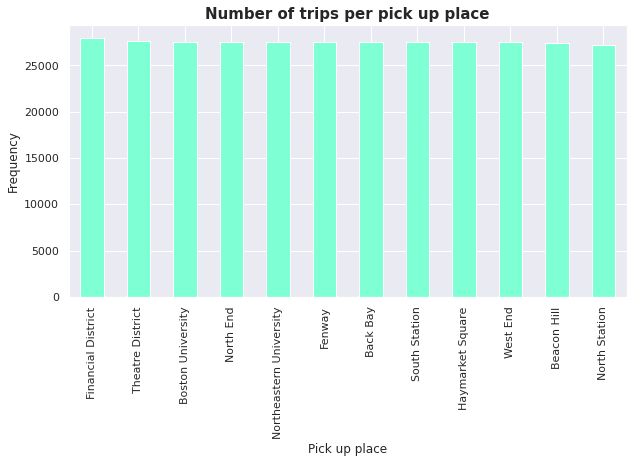

In [ ]:
# most popular pick up places with Uber: 

Uber_rides['source'].value_counts().plot(kind='bar',figsize=(10,5),color ='aquamarine')
plt.xlabel('Pick up place')
plt.ylabel('Frequency')
plt.title('Number of trips per pick up place', size = 15, fontweight="bold")

Text(0.5, 1.0, 'Number of trips per drop off place')

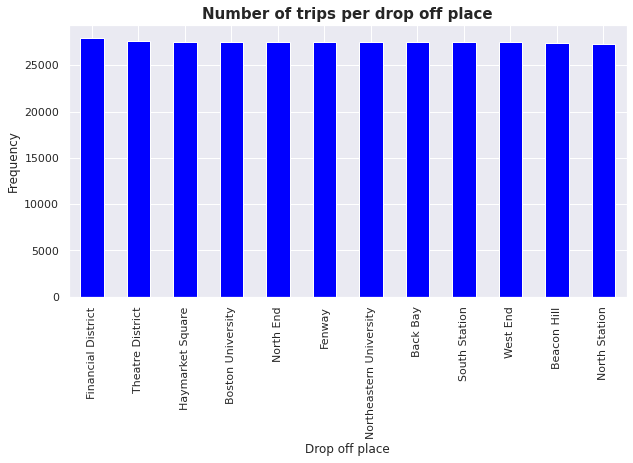

In [ ]:
# most popular drop of up places with Uber: 

Uber_rides['destination'].value_counts().plot(kind='bar',figsize=(10, 5),color='blue')
plt.xlabel('Drop off place')
plt.ylabel('Frequency')
plt.title('Number of trips per drop off place', size = 15, fontweight="bold")

##**Lyft**

In [ ]:
Lyft_rides.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307408 entries, 0 to 693053
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                307408 non-null  object        
 1   hour              307408 non-null  int64         
 2   day               307408 non-null  int64         
 3   month             307408 non-null  int64         
 4   datetime          307408 non-null  datetime64[ns]
 5   source            307408 non-null  object        
 6   destination       307408 non-null  object        
 7   cab_type          307408 non-null  object        
 8   product_id        307408 non-null  object        
 9   name              307408 non-null  object        
 10  price             307408 non-null  float64       
 11  distance          307408 non-null  float64       
 12  surge_multiplier  307408 non-null  float64       
 13  latitude          307408 non-null  float64       
 14  long

In [ ]:
Lyft_stats = Lyft_rides.describe()
Lyft_stats

,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,day_of_week
count,307408.000000,307408.000000,307408.000000,307408.000000,307408.000000,307408.00000,307408.000000,307408.000000,307408.000000,307408.000000
mean,11.628920,17.773477,11.587112,17.351396,2.186976,1.03127,42.338371,-71.066188,39.596384,2.784427
std,6.955654,9.991441,0.492354,10.019171,1.086622,0.13561,0.047636,0.020281,6.730425,2.056630
min,0.000000,1.000000,11.000000,2.500000,0.390000,1.00000,42.214800,-71.105400,18.910000,0.000000
25%,6.000000,13.000000,11.000000,9.000000,1.270000,1.00000,42.350300,-71.081000,36.450000,1.000000
50%,12.000000,17.000000,12.000000,16.500000,2.140000,1.00000,42.351900,-71.063100,40.490000,3.000000
75%,18.000000,28.000000,12.000000,22.500000,2.970000,1.00000,42.364700,-71.054200,43.580000,5.000000
max,23.000000,30.000000,12.000000,97.500000,6.330000,3.00000,42.366100,-71.033000,57.220000,6.000000


In [ ]:
Lyft_stats.to_csv('lyft_stats.csv', index=True)

In [ ]:
Lyft_rides['surge_multiplier'].value_counts()

1.00    286433
1.25     11085
1.50      5065
1.75      2420
2.00      2239
2.50       154
3.00        12
Name: surge_multiplier, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



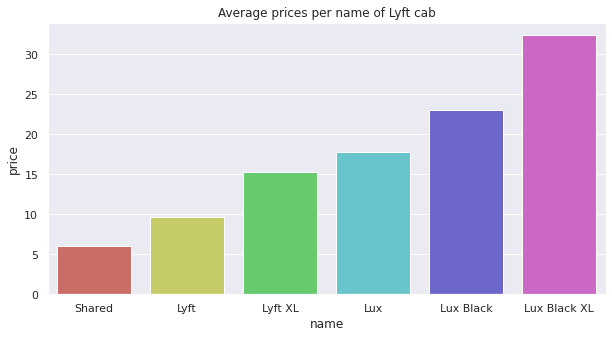

In [ ]:
#Prices per Lyft's name: 
Price_Lyft=Lyft_rides.groupby(["name"])[["price"]].mean()
plt.figure(figsize = (10,5))
sns.barplot(Price_Lyft.index, Price_Lyft["price"], palette = "hls", order = Price_Lyft["price"].sort_values().index).set(title = 'Average prices per name of Lyft cab')
plt.show()

In [ ]:
Lyft_rides['name'].value_counts()

Lux             51235
Lyft            51235
Lux Black XL    51235
Lyft XL         51235
Lux Black       51235
Shared          51233
Name: name, dtype: int64

In [ ]:
Lyft_cor=Lyft_rides.drop(['surge_multiplier'], axis =1).corr()
Lyft_cor

,hour,day,month,price,distance,latitude,longitude,temperature,day_of_week
hour,1.000000,0.068343,-0.082475,0.000055,0.001249,0.019597,-0.002298,0.221300,-0.007997
day,0.068343,1.000000,-0.861334,-0.002248,-0.005372,0.006967,0.080447,-0.085927,-0.297532
month,-0.082475,-0.861334,1.000000,0.002550,0.005813,0.084906,-0.127169,-0.079938,0.305279
price,0.000055,-0.002248,0.002550,1.000000,0.361567,0.002461,-0.001877,-0.002042,0.003009
distance,0.001249,-0.005372,0.005813,0.361567,1.000000,-0.000552,-0.001735,-0.004321,0.005309
latitude,0.019597,0.006967,0.084906,0.002461,-0.000552,1.000000,-0.528363,-0.100123,0.125338
longitude,-0.002298,0.080447,-0.127169,-0.001877,-0.001735,-0.528363,1.000000,0.013300,-0.091350
temperature,0.221300,-0.085927,-0.079938,-0.002042,-0.004321,-0.100123,0.013300,1.000000,-0.080504
day_of_week,-0.007997,-0.297532,0.305279,0.003009,0.005309,0.125338,-0.091350,-0.080504,1.000000


In [ ]:
Lyft_cor.to_csv('lyft_cor.csv', index=True)

In [ ]:
# A correlation matrix for Uber dataset: 

Lyft_cor.style.background_gradient()

,hour,day,month,price,distance,latitude,longitude,temperature,day_of_week
hour,1.000000,0.068343,-0.082475,0.000055,0.001249,0.019597,-0.002298,0.221300,-0.007997
day,0.068343,1.000000,-0.861334,-0.002248,-0.005372,0.006967,0.080447,-0.085927,-0.297532
month,-0.082475,-0.861334,1.000000,0.002550,0.005813,0.084906,-0.127169,-0.079938,0.305279
price,0.000055,-0.002248,0.002550,1.000000,0.361567,0.002461,-0.001877,-0.002042,0.003009
distance,0.001249,-0.005372,0.005813,0.361567,1.000000,-0.000552,-0.001735,-0.004321,0.005309
latitude,0.019597,0.006967,0.084906,0.002461,-0.000552,1.000000,-0.528363,-0.100123,0.125338
longitude,-0.002298,0.080447,-0.127169,-0.001877,-0.001735,-0.528363,1.000000,0.013300,-0.091350
temperature,0.221300,-0.085927,-0.079938,-0.002042,-0.004321,-0.100123,0.013300,1.000000,-0.080504
day_of_week,-0.007997,-0.297532,0.305279,0.003009,0.005309,0.125338,-0.091350,-0.080504,1.000000


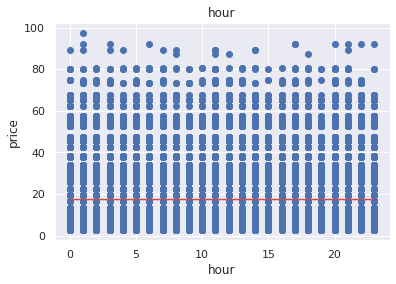

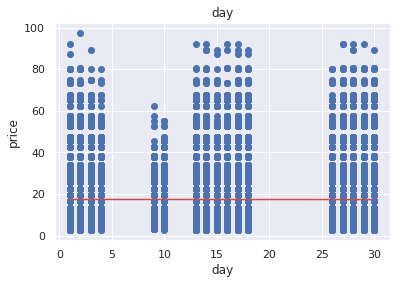

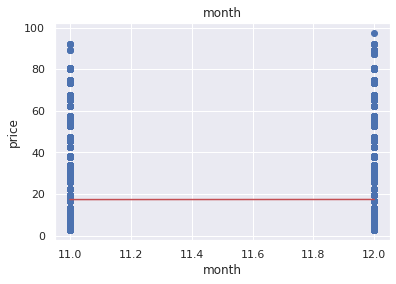

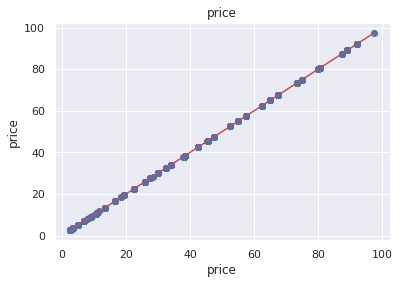

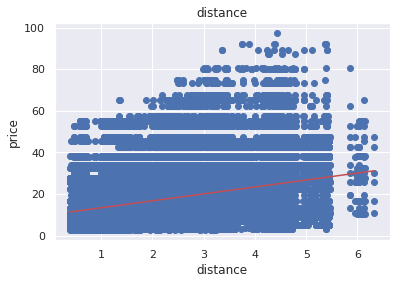

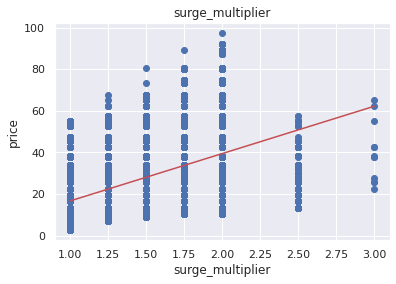

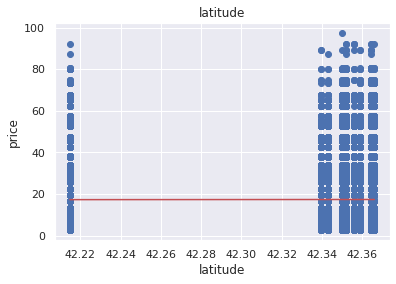

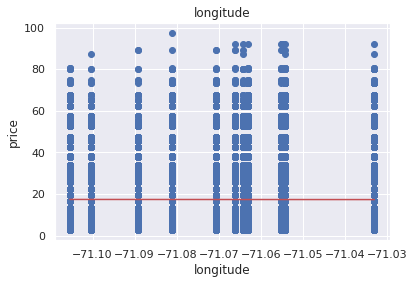

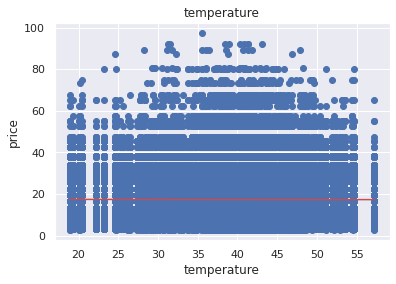

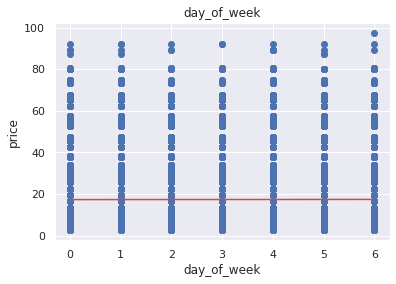

In [ ]:
#Graphs of correlation for Lyft dataset variables: 

col_names_lyft = Lyft_rides.columns
for v in col_names_lyft:
  if Lyft_rides[v].dtypes in ("int64", "float64"):
    price = Lyft_rides["price"]
    other = Lyft_rides[v]
    plt.xlabel(v)
    plt.ylabel('price')
    plt.title(v)
    plt.scatter(other, price)
    try:
        plt.plot(np.unique(other), np.poly1d(np.polyfit(other, price, 1))(np.unique(other)), color="r")
    except:
      print(v)
    plt.show()

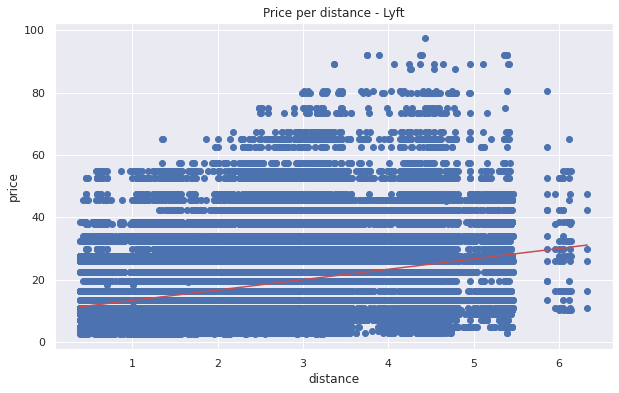

In [ ]:
distance = Lyft_rides['distance']
price = Lyft_rides['price']
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = distance, y = price)
plt.xlabel("distance")
plt.ylabel("price")
plt.title("Price per distance - Lyft")
plt.plot(np.unique(distance), np.poly1d(np.polyfit(distance, price, 1))(np.unique(distance)), color="r")
plt.show()

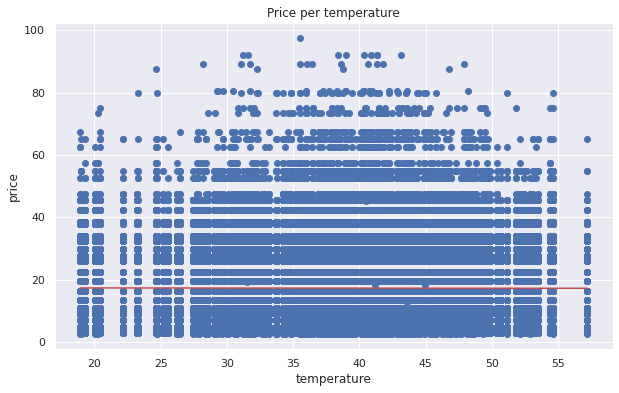

In [ ]:

distance = Lyft_rides['temperature']
price = Lyft_rides['price']
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = distance, y = price)
plt.xlabel("temperature")
plt.ylabel("price")
plt.title("Price per temperature")
plt.plot(np.unique(distance), np.poly1d(np.polyfit(distance, price, 1))(np.unique(distance)), color="r")
plt.show()

Text(0.5, 1.0, 'Frequency of distances for Lyft rides')

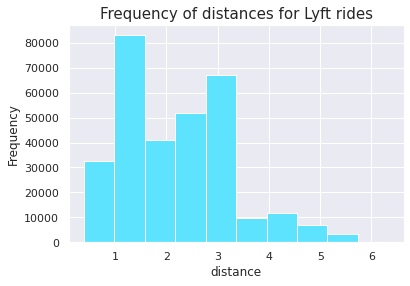

In [ ]:
# the distance people drive with Lyft:

Lyft_rides['distance'].plot.hist(bins = 10, alpha=1, color = "#5ee3ff")
plt.xlabel('distance')
plt.title('Frequency of distances for Lyft rides', fontsize = 15) 

Text(0.5, 1.0, 'Number of trips per hours')

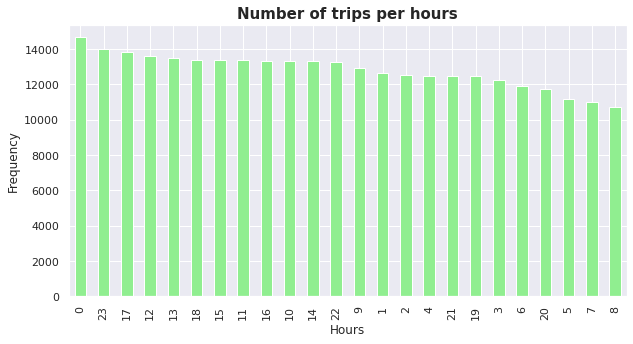

In [ ]:
# what hours people use the Lyft: 

hours = Lyft_rides['datetime'].dt.hour.value_counts()
hours.plot(kind='bar',color='lightgreen',figsize=(10,5))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of trips per hours', size = 15, fontweight="bold") # 0 hour = 12 am

In [ ]:
%%capture
!pip install kaleido
!pip install plotly>=4.0.0
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

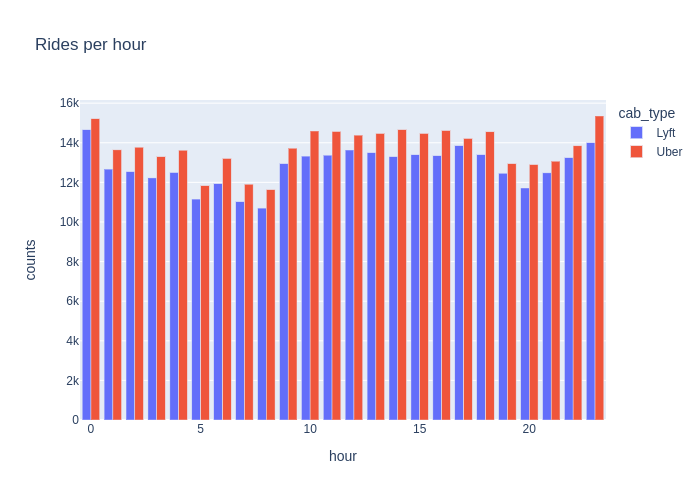

In [ ]:
df2 =dfrideshare.groupby(["hour","cab_type"]).size().reset_index(name="counts")
fig = px.bar(data_frame=df2, x="hour", y="counts", color="cab_type", title="Rides per hour")
fig.update_layout(barmode='group')
fig.show(renderer='png')

In [ ]:
Lyft_rides[['hour', 'surge_multiplier']][Lyft_rides['hour'] == 0].value_counts()

hour  surge_multiplier
0     1.00                13621
      1.25                  589
      1.50                  211
      1.75                  129
      2.00                   97
      2.50                   10
dtype: int64

Text(0.5, 1.0, 'Number of trips per week day')

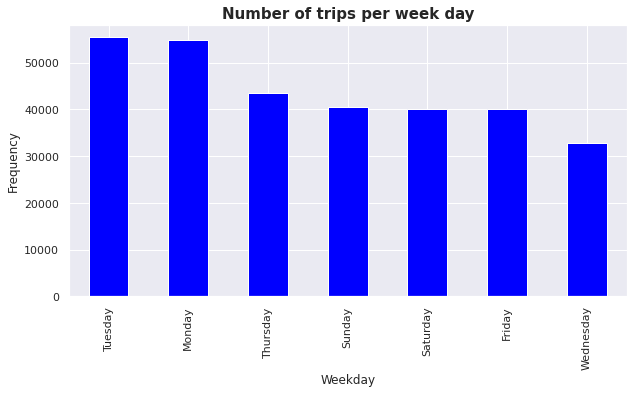

In [ ]:
# which weekday people use Lyft the most:

Lyft_rides['weekday'].value_counts().plot(kind='bar',figsize=(10,5),color='blue')
plt.xlabel('Weekday')
plt.ylabel('Frequency')
plt.title('Number of trips per week day', size = 15, fontweight="bold")

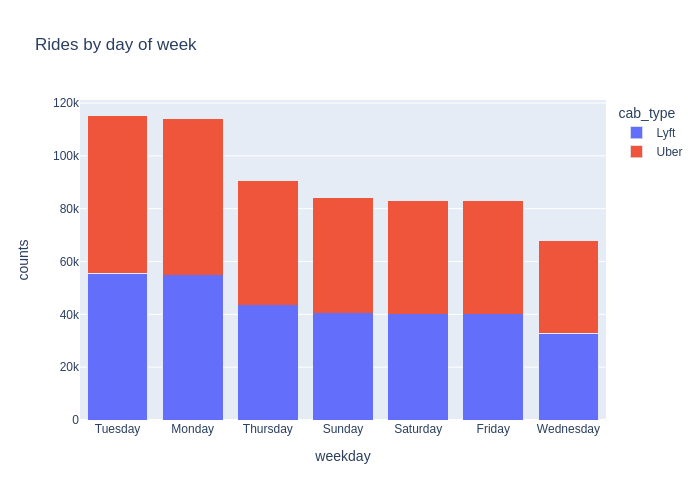

In [ ]:


df3 =dfrideshare.groupby(["weekday","cab_type"]).size().reset_index(name="counts")
fig2 = px.bar(data_frame=df3, x="weekday", y="counts", color="cab_type", title="Rides by day of week", height=500)
fig2.update_layout(barmode='group')
fig2.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig2.show(renderer='png')

Text(0.5, 1.0, 'Number of trips per day, month')

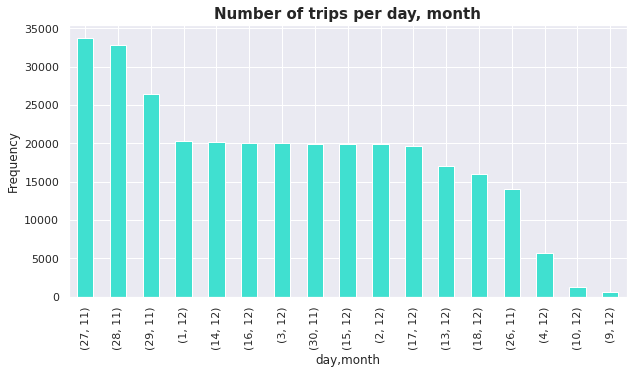

In [ ]:
#Which day has the highest count of with Lyft: 

Lyft_rides[['day', 'month']].value_counts().plot(kind='bar',figsize=(10,5),color='turquoise')
plt.ylabel('Frequency')
plt.title('Number of trips per day, month', size = 15, fontweight="bold")

 #Thansgiving day in 2018 = Thursday, November 22

Text(0.5, 1.0, 'Number of trips per pick up place')

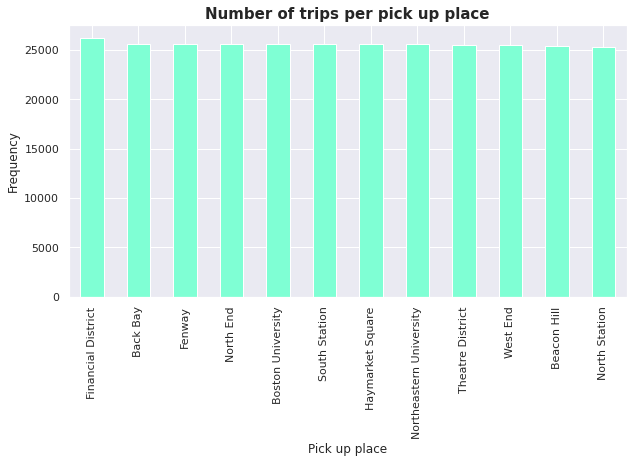

In [ ]:
# most popular pick up places with Lyft: 

Lyft_rides['source'].value_counts().plot(kind='bar',figsize=(10,5),color ='aquamarine')
plt.xlabel('Pick up place')
plt.ylabel('Frequency')
plt.title('Number of trips per pick up place', size = 15, fontweight="bold")

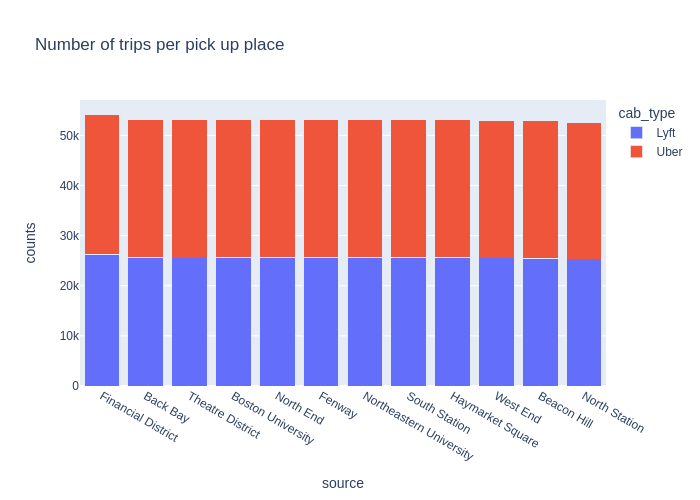

In [ ]:
df4 =dfrideshare.groupby(["source","cab_type"]).size().reset_index(name="counts")
fig3 = px.bar(data_frame=df4, x="source", y="counts", color="cab_type", title="Number of trips per pick up place", height=500)
fig3.update_layout(barmode='group')
fig3.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig3.show(renderer='png')

Text(0.5, 1.0, 'Number of trips per drop off place')

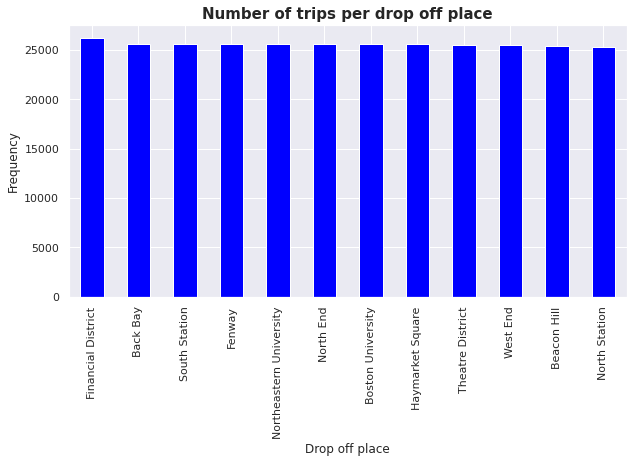

In [ ]:
# most popular drop of up places with Lyft: 

Lyft_rides['destination'].value_counts().plot(kind='bar',figsize=(10, 5),color='blue')
plt.xlabel('Drop off place')
plt.ylabel('Frequency')
plt.title('Number of trips per drop off place', size = 15, fontweight="bold")

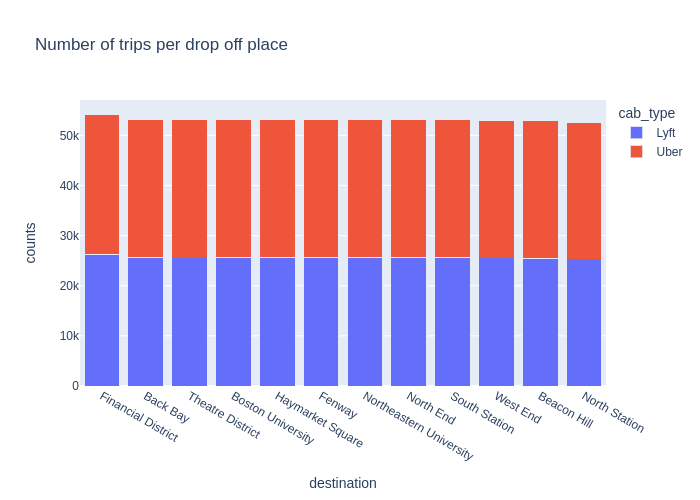

In [ ]:
df5 =dfrideshare.groupby(["destination","cab_type"]).size().reset_index(name="counts")
fig4 = px.bar(data_frame=df5, x="destination", y="counts", color="cab_type", title="Number of trips per drop off place", height=500)
fig4.update_layout(barmode='group')
fig4.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig4.show(renderer='png')

In [ ]:
Lyft_rides.groupby(by=["destination","source"]).agg({'latitude':'mean','longitude':'mean'})

latitude  longitude
destination source                                       
Back Bay    Boston University        42.337992 -71.066000
            Fenway                   42.336043 -71.065360
            Haymarket Square         42.336899 -71.065163
            North End                42.337747 -71.066067
            Northeastern University  42.336136 -71.065432
...                                        ...        ...
West End    Fenway                   42.338281 -71.066523
            Haymarket Square         42.339741 -71.066413
            North End                42.337567 -71.066360
            Northeastern University  42.339527 -71.066745
            South Station            42.340095 -71.067431

[72 rows x 2 columns]

In [ ]:
#import sys
#'geopandas' in sys.modules

In [ ]:
#pip install geopandas


In [ ]:
#import geopandas as gpd
#import folium
#from folium.plugins import FastMarkerCluster
#Lyft_rides_des = Lyft_rides[Lyft_rides['destination']=='Back Bay']
#my_map = folium.Map(location=[Lyft_rides_des["latitude"].mean(), Lyft_rides_des["longitude"].mean()],zoom_start = 10)
#my_map = my_map.add_child(FastMarkerCluster(Lyft_rides_des[['latitude', 'longitude']].values.tolist()))
#my_map


In [ ]:
#back to the original datasets: 

dfrideshare.head()

,id,hour,day,month,datetime,...,latitude,longitude,temperature,day_of_week,weekday
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,9,16,12,2018-12-16 09:30:07,...,42.2148,-71.033,42.34,6,Sunday
1,4bd23055-6827-41c6-b23b-3c491f24e74d,2,27,11,2018-11-27 02:00:23,...,42.2148,-71.033,43.58,1,Tuesday
2,981a3613-77af-4620-a42a-0c0866077d1e,1,28,11,2018-11-28 01:00:22,...,42.2148,-71.033,38.33,2,Wednesday
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,4,30,11,2018-11-30 04:53:02,...,42.2148,-71.033,34.38,4,Friday
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,3,29,11,2018-11-29 03:49:20,...,42.2148,-71.033,37.44,3,Thursday


In [ ]:
dfrideshare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                637976 non-null  object        
 1   hour              637976 non-null  int64         
 2   day               637976 non-null  int64         
 3   month             637976 non-null  int64         
 4   datetime          637976 non-null  datetime64[ns]
 5   source            637976 non-null  object        
 6   destination       637976 non-null  object        
 7   cab_type          637976 non-null  object        
 8   product_id        637976 non-null  object        
 9   name              637976 non-null  object        
 10  price             637976 non-null  float64       
 11  distance          637976 non-null  float64       
 12  surge_multiplier  637976 non-null  float64       
 13  latitude          637976 non-null  float64       
 14  long

In [ ]:
rides_cor = dfrideshare.corr() # correlation of price with distance and surge_multiplier
rides_cor

,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,day_of_week
hour,1.000000,0.066223,-0.079734,0.000561,0.002283,-0.000067,0.019228,-0.005986,0.218829,-0.005066
day,0.066223,1.000000,-0.861325,-0.000722,-0.000992,0.001397,0.006744,0.078539,-0.083934,-0.297723
month,-0.079734,-0.861325,1.000000,0.000913,0.002402,-0.000612,0.085946,-0.126763,-0.082048,0.303445
price,0.000561,-0.000722,0.000913,1.000000,0.345061,0.240458,0.002088,-0.001417,-0.000084,0.001176
distance,0.002283,-0.000992,0.002402,0.345061,1.000000,0.025946,0.000984,-0.000415,-0.002738,0.003058
surge_multiplier,-0.000067,0.001397,-0.000612,0.240458,0.025946,1.000000,0.001471,-0.001961,-0.001594,-0.001600
latitude,0.019228,0.006744,0.085946,0.002088,0.000984,0.001471,1.000000,-0.531443,-0.098909,0.120504
longitude,-0.005986,0.078539,-0.126763,-0.001417,-0.000415,-0.001961,-0.531443,1.000000,0.012402,-0.088815
temperature,0.218829,-0.083934,-0.082048,-0.000084,-0.002738,-0.001594,-0.098909,0.012402,1.000000,-0.079846
day_of_week,-0.005066,-0.297723,0.303445,0.001176,0.003058,-0.001600,0.120504,-0.088815,-0.079846,1.000000


In [ ]:
rides_cor.to_csv('rides_cor.csv', index=True)

In [ ]:
#create new dataset with 3 variables:

newdata = dfrideshare.filter(['cab_type','distance', 'surge_multiplier', 'price'])
newdata.head()

,cab_type,distance,surge_multiplier,price
0,Lyft,0.44,1.0,5.0
1,Lyft,0.44,1.0,11.0
2,Lyft,0.44,1.0,7.0
3,Lyft,0.44,1.0,26.0
4,Lyft,0.44,1.0,9.0


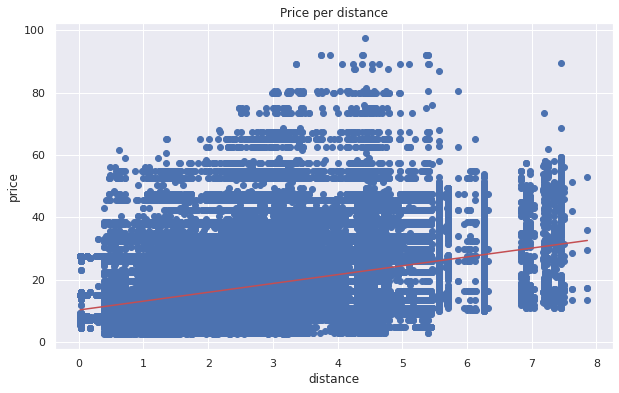

In [ ]:
distance = newdata['distance']
price = newdata['price']
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = distance, y = price)
plt.xlabel("distance")
plt.ylabel("price")
plt.title("Price per distance")
plt.plot(np.unique(distance), np.poly1d(np.polyfit(distance, price, 1))(np.unique(distance)), color="r")
plt.show()

[Text(0.5, 1.0, 'Price per distance')]

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



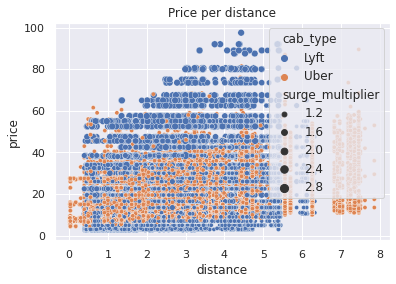

In [ ]:
sns.scatterplot(data = newdata, x = "distance",
                y = "price", hue = "cab_type", size = "surge_multiplier").set(title = 'Price per distance')


In [ ]:
import statsmodels.api as sm
from statsmodels.api import OLS

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:

features = sm.add_constant(newdata[['distance', 'surge_multiplier']])
ols_sm=OLS(newdata.price, features)
model=ols_sm.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                 6.659e+04
Date:                Thu, 09 Jun 2022   Prob (F-statistic):               0.00
Time:                        01:04:44   Log-Likelihood:            -2.2691e+06
No. Observations:              637976   AIC:                         4.538e+06
Df Residuals:                  637973   BIC:                         4.538e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -12.5290      0.115  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

